# Assignment 3: ICP + Non-linear least squares optimization

TEAM-ID:  28 

TEAM-NAME: lilly  

YOUR-ID:  2018102032 

YOUR-NAME: Raja Vechalapu

(Although you work in groups, both the students have to submit to Moodle, hence there's name field above)


## Instructions

* Please check Moodle for "TEAM-ID" and "TEAM-NAME" fields above. Some of your names have been edited because of redundancy/simplicity. Instructions for submitting the assignment through GitHub Classrooms/Moodle has been uploaded on Moodle. Any clarifications will be made there itself.
* Code must be written in Python in Jupyter Notebooks. You can use Assignment-1's environment for this assignment. More instructions for setup provided as you progress through this assignment.
* Both the team members must submit the zip file.
* You are not allowed to use any external libraries (other than ones being imported below).
* Answer the descriptive questions in your own words with context & clarity. Do not just copy-paste from some Wikipedia page. You will be evaluated accordingly.
* You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.

In [10]:
# Only allowed to use these libraries for this assignment. 
# Setup: Just activate Assignment-1's environment and install matplotlib `python -m pip install -U matplotlib`

import numpy as np
import math
import matplotlib.pyplot as plt
import time

# Question 1: Simple Non-Linear least squares for Gaussian function

First, go through the [solved example here](https://www.notion.so/saishubodh/From-linear-algebra-to-non-linear-weighted-least-squares-13cf17d318be4d45bb8577c4d3ea4a02#1de60a8465664d39a12af24353feef9e) from the [notes page](https://www.notion.so/saishubodh/Mobile-Robotics-2020-Students-Page-0b65a9c20edd4081978f4ffad917febb#a68cabac64754fa485144cc89b4b8c65). After understanding this, 

(1.1) Code it from scratch using `numpy` and try it out yourself for say different number of iterations with a certain tolerance for all 50 observations using Gradient Descent. Make the following plots using `matplotlib`:
   * Data and fit plot: Ground truth Gaussian, observations (points) & predicted Gaussian on the same plot.
   * Cost function ($\|r\|^2$) vs number of iterations   
   
Experiment with the hyperparameters and compile your observations in a table. Clearly mention your hyperparameters with justification.

(1.2) You've used Gradient Descent above. Now implement Gauss-Newton and LM algorithms. To contrast between the three, you must experiment with 
   * Different initial estimate: Can a particular algorithm handle if the initial estimate is too far from GT?
   * Different number of observations: Can a particular algorithm handle very less observations?
   * Add [noise](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) to your observations: Can a particular algorithm handle large noise?
   * What else can you think of? (For example, can an algorithm converge in less iterations compared to others?)
    
Make the plots (mentioned in 1.1) for all 3 algorithms. Report your observations in a table(s) (comparison between the three for different factors). You will be awarded depending on how comprehensive your experimentation is (which you have to explain below under "**Answers for Question 1**" section).

## Code for Question 1

In [11]:
# Only numpy & matplotlib is sufficient for this question.
##############################################################################
# TODO: Do tasks described in Question 1                                     #
##############################################################################
# Replace "pass" statement with your code (You can split this cell into
# multiple cells if you wish to)
from numpy import linalg as LA

a_g=10
m_g=0
s_g=20

n_obs = 50
x_obs = np.linspace(-25,25,n_obs)
y_obs = a_g*np.exp(-(x_obs-m_g)*(x_obs-m_g)/(2*s_g*s_g))
#y_obs= y_obs +   0.04*np.random.normal(0, 1, y_obs.shape)
def guass(a,m,s):
    return a*np.exp(-(x_obs-m)*(x_obs-m)/(2*s*s))
def residuals(a,m,s):
    return a*np.exp(-(x_obs-m)*(x_obs-m)/(2*s*s))-y_obs

def jacobian(a,m,s):
    l1=np.exp(-(x_obs-m)*(x_obs-m)/(2*s*s))
    l2=(a*(x_obs-m)/(s*s))*(np.exp(-(x_obs-m)*(x_obs-m)/(2*s*s)))
    l3= (a*((x_obs-m)*(x_obs-m)/(s*s*s)))*(np.exp(-(x_obs-m)*(x_obs-m)/(2*s*s)))
    
    l1 = l1.reshape((n_obs,1))
    l2 = l2.reshape((n_obs,1))
    l3 = l3.reshape((n_obs,1))
    
    u=np.concatenate((l1,l2),axis=1)
    out= np.concatenate((u,l3),axis=1)
    return out


k=np.transpose([10,13,19])
k_ini=k
y_ini=guass(k[0],k[1],k[2])

def Grad_Desc(lr,max_iter,tol,k_in):
    X=[]
    Y=[]
    k=k_in
    for i in range(max_iter):
        residual = residuals(k[0],k[1],k[2])
        jacob  = jacobian(k[0],k[1],k[2])
        k_del  = -lr*(np.matmul(np.transpose(jacob),residual))
        k = k+k_del
        if(LA.norm(k_del)<tol):
            break
        y=LA.norm(residual)
        X.append(i)
        Y.append(y*y)
    y_pred=guass(k[0],k[1],k[2])
    print(k)
    return y_pred,X,Y

    
def Gauss_Newton(max_iter,tol,k_in):
    X=[]
    Y=[]
    k=k_in
    for i in range(max_iter):
        residual = residuals(k[0],k[1],k[2])
        jacob  = jacobian(k[0],k[1],k[2])
        k_1  = (np.matmul(np.transpose(jacob),residual))
        k_2  = np.linalg.inv(np.matmul(np.transpose(jacob),jacob))
        k_del= -1*np.matmul(k_1,k_2)
        k = k+k_del
        if(LA.norm(k_del)<tol):
            break
        y=LA.norm(residual)
        X.append(i)
        Y.append(y*y)
    y_pred=guass(k[0],k[1],k[2])
    print(k)
    return y_pred,X,Y
    
def LM(lam,max_iter,tol,k_in):
    X=[]
    Y=[]
    k=k_in
    for i in range(max_iter):
        residual = residuals(k[0],k[1],k[2])
        jacob  = jacobian(k[0],k[1],k[2])
        k_1  = (np.matmul(np.transpose(jacob),residual))
        k_2  = np.linalg.inv(np.matmul(np.transpose(jacob),jacob)+lam*np.identity(3))
        k_del= -1*np.matmul(k_1,k_2)
        k_new = k+k_del
        if(LA.norm(k_del)<tol):
            break
        
        residual_new = residuals(k_new[0],k_new[1],k_new[2])
        if(LA.norm(residual)<LA.norm(residual_new)):
            lam=lam*10
        else:
            k=k_new
            lam=lam/10
        y=LA.norm(residual)
        X.append(i)
        Y.append(y*y)
    y_pred=guass(k[0],k[1],k[2])
    #print(k)
    return y_pred,X,Y

def plotting(p,y,X,Y,c):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=[10,6])
    if(p=='GD'):
        fig.suptitle('Gradient Descent'+" - "+"plot"+" "+str(c))
    if(p=='GN'):
        fig.suptitle('Gauss Newton')
    if(p=='LM'):
        fig.suptitle('LM')
    ax1.plot(X,Y,'-o',alpha=0.8)
    ax2.plot(x_obs,y_obs,'-o',color='g',label="Original")
    ax2.plot(x_obs,y,color='r',label="Pred")
    ax2.legend(loc="upper right")
    plt.show()

#y ,X ,Y = LM(10,5000,1e-15,k_ini)
#plotting('LM',y,X,Y,8)

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

[ 19.45906533 422.20735986 312.25946885]


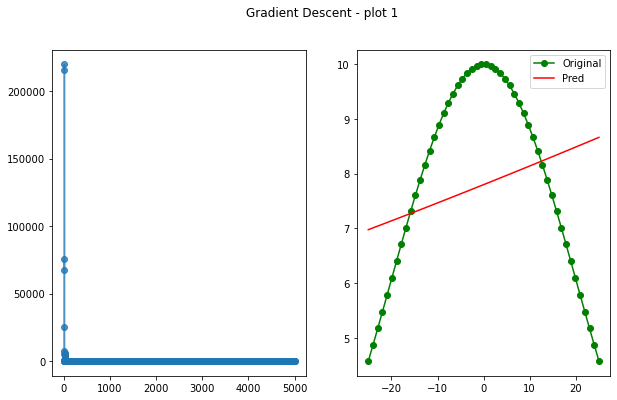

[ 1.00000000e+01 -8.81559419e-16  2.00000000e+01]


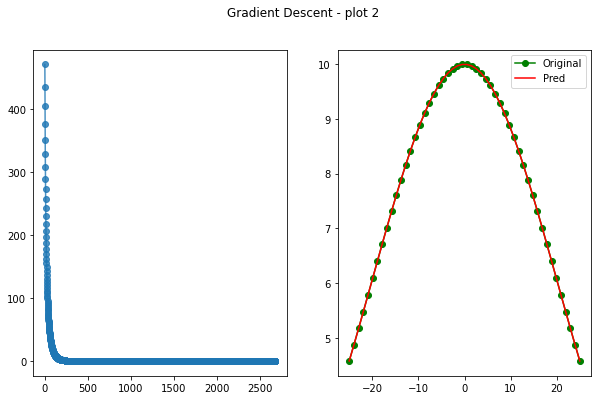

[ 1.00000000e+01 -8.86443388e-16  2.00000000e+01]


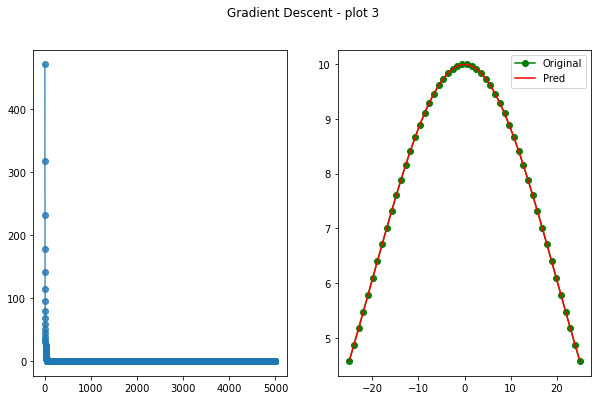

[ 1.00000000e+01 -9.13982768e-16  2.00000000e+01]


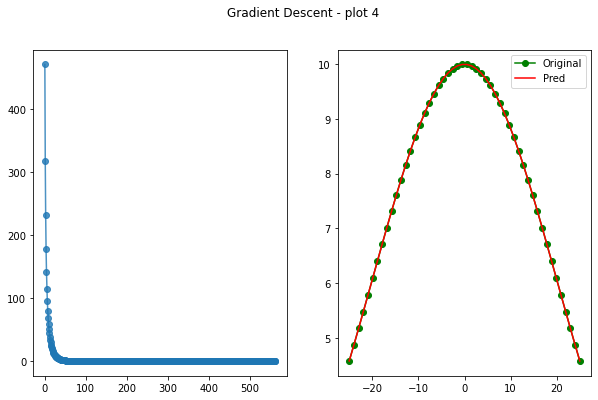

[ 9.85772579  0.06056624 20.82793127]


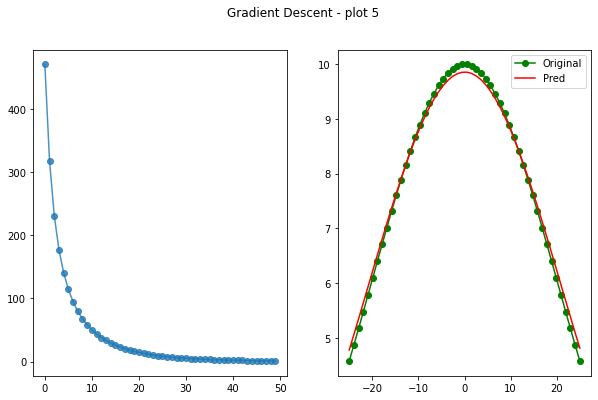

[ 9.85772579  0.06056624 20.82793127]


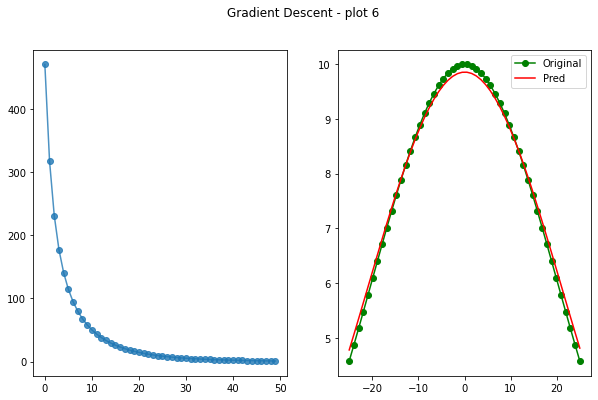

[ 1.00000000e+01 -8.89083679e-17  2.00000000e+01]


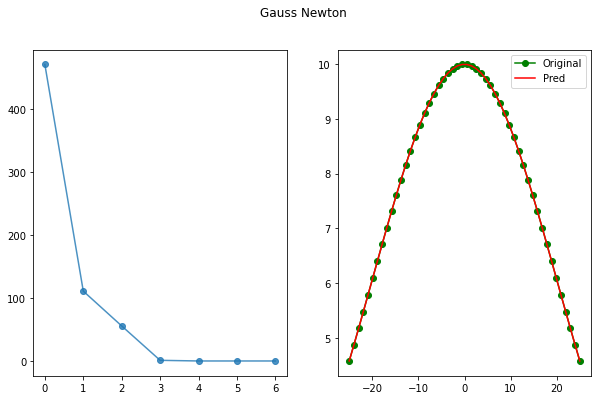

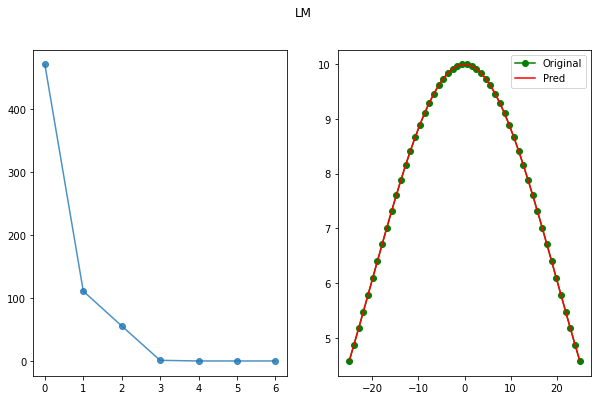

In [12]:
## Define the plots inside a function above and call them in this cell one by one. When I run this cell, all plots
## asked in Q1 should be generated. 
##############################################################################
# TODO: Plotting for Question 1                                              #

#Tuning Gradient Descent Hyperparameters
y ,X ,Y = Grad_Desc(0.1,5000,2e-15,k_ini)
plotting('GD',y,X,Y,1)

y ,X ,Y = Grad_Desc(0.01,5000,2e-15,k_ini)
plotting('GD',y,X,Y,2)

y ,X ,Y = Grad_Desc(0.049,5000,1e-15,k_ini)
plotting('GD',y,X,Y,3)

y ,X ,Y = Grad_Desc(0.049,5000,2e-15,k_ini)
plotting('GD',y,X,Y,4)

y ,X ,Y = Grad_Desc(0.0492,50,2e-15,k_ini)
plotting('GD',y,X,Y,5)

y ,X ,Y = Grad_Desc(0.0492,50,2e-15,k_ini)
plotting('GD',y,X,Y,6)

#Plotting Gauss Newton
y ,X ,Y = Gauss_Newton(150,1e-15,k_ini)
plotting('GN',y,X,Y,7)

#Tuning LM
y ,X ,Y = LM(0.0001,150,1e-15,k_ini)
plotting('LM',y,X,Y,8)
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

## Answers for Question 1
Add explanations for the answers along with tables here.
### Answer for 1.1
The Hyperparameters tuned for Gradient Descent algorithm are 
1. Learning Rata 
2. Max_Iterations
3. Tolerence

From the experimentation we got to a conclusion that ,

**1. Keeping the Max_iterations and Tolerence High and tuning the "Learning rate":**
 
  - High values of Learning rate implies big steps in gradients which implies moving close to minima but after some big steps we will gradually move away from the optima.
   - Experimented values of Lr-[0.1,0.01,0.049] , plots - 1,2,3.

**2. Now keeping the optimal learning rate found above and tuning "Tolerance":**
 
   - Tolerance is found to have an inverse relation with "the number of iterations required for accurate prediction". 
           
       -  Even with good learning rate if we keep tolerance to be very low then,The converging requires more iterations but an accurate prediction can be aceived with higher iterations and
       -  In the other case if we keep tolerance to be higher than the optimal, a deviation in prediction and  original can be observed because of not considering the effective adjustments to parameters. 
          
           - Experimented values - [1e-15 , 2e-15 , 1e-1] , plots - 3,4,5.

**3. Tuning Max_Iterations:**
            Max_Iterations should be sufficient enough i.e near to the converging iterations in order to get a accurate prediction. 
            
   - Experimented values - [5000 , 50 ,500] , plots -  5,6

|S.No| LearningRate  | Max_Iterations| Tolerence|Observation   |
|-   | ------------- |:-------------:| -------: |-------:      |
|1   | 0.1           | 5000          | 2e-15    |Didn't converege and prediction was not at all good|
|2   | 0.01          | 5000          | 2e-15    |Converged after 2600 iterations and prediction is accurate    |
|3   | 0.049         | 5000          | 1e-15    |Didn't converge but prediction is accurate     |
|4   | 0.049         | 5000          | 1e-1    |Didn't converge and a deviation in prediction and orginal     |
|5   | 0.049         | 5000          | 2e-15    |Converged after 500 iterations and prediction is accurate      |
|6   | 0.049         | 50            | 2e-15    |Didn't converge and predictions has a deviation from original      |






### Answer for 1.2
Explain your experimentations with justification here.

### 1.Different initial estimate:

   - when the initial estimates are so far in most of the cases GN is also converging but in some cases like [1,9,11] it is becoming straight line and in some cases it will even come accross an error this is because the svd will be singualr so not invertible.
   - where as the LM algo makes sure that the data doesnot encounter an error by making it non-zero matrix always and makes it invertible so that this always converges
   - And there is high chance that if the distance between GT and the actual prediction is too far then the LM and GN converge at local minimum and makes the graphs converge but the prediction of the GT is false. 
  
     -  Example: in observation [-11,-19,-11] the result of both comes out to be [10,0,-20] approximately which gives the same graph as the original one but not exactly the same GT 
                   
   - Even in GD if the values are too far and the learning rate is too small and the number of iterations is some what reasonable ie 1000 to 5000 itrations then it will converge to local minima as if it is converging in GN
                   
| Initial estimates (a,m,s)         | GD( alpha =0.05)        |GN   |LM (lambda=10)|
| ------------- |:-------------:| -------:|-------:|
| (10,13,19)      |    ~540   | 6|6|
| (75,-27,52)      |   >11000   | Didn't converge(jacardian is not invertible)|25|
| (13,12,41)      |    3400   |stuck in local minima giving a straight line|150|
| (10,1,20)      |    540   | 3|50|
| (-42,-31,-67)      |    dinot converge  |didnot converge  -det(J)=0|50|

### 2. Different number of observations:
                
|Number of observations|GD(number of iterations with learning rate=0.05)|GN |LM(lambda=10)|
|----------------------|------------------------------------------------|-- |-------------|
|350                   | dinot converge for many iterations (10k)       |11|14          |
|130                   | ~350|18|~9|
|32|~1000|5|5|
|3|~5k|150|~150|

  - By this we can observe that the initialisation is more important than number of observcations because the number of observations are not constantly decreasing nor ins=creasing it is mainly depepnding on initialisation and the tolerence .
   - And the GD overshoots sometimes for alpha being the bigger value then it wont converge at all so Lm and Gn can ahndle less number of iterations always but not GD

### 3. Noise is added :

  - when noise is added all the algorithms started to give some error but the largest noice which LM and gauss newton can handle is nearer to the variance of **0.1**.
  - if we increase the variance more and more it is not giving the good predictions. And the gradient descent with the smaller learning rate such as **0.049** with more iterations giving the small errors . And when variance of noise is **<0.05** the gradient descent with maximum of 0.05 learning rate gives the reasonable predictions.
  - It can be observed that all three algo's are affected in terms of no.of iterations to converge on addition of Noise, LM has a minimal affect among all. 
  
### 4. can an algorithm converge in less iterations compared to others:

 - GN is converged for the lesser iterations compared to remaining because GD's learning rate is very low and it converges very slow and even the LM is the combination of GN and GD so the effect of lamda shows here and make this slow compared to the GN.
 - And if the lamda is given correctly then it is fast enough to math with GN too. Some observations are made from lambda=10 and some are from 2 sometimes 2 converging faster and more times  10 is converigng faster
        
### 5. Conclusion :
                
   - The LM speed is mainly dependent on $ lambda $ too if it is initialised good enough it is faster than GN. 
   - I think LM is best in overll complexity and eficiency because even though it is slow compared to the GN, it never gets the isseus with svd because it is making sure that the A is invertible with the help of lambda given 
   - Even the time compared between the GN and LM is not so much big so i prefer LM than the remaining and i am preferring LM instead of GD because its learning rate should be slow even it is very slow it have high probability of strucking in the local minima as if the LM strucks but the graphs becomes reasonable in both the cases as shown in the plots.
   - LM acts similar to GD when optimal values are farther away from initial and GN when they are close
   - When learning rate is decreased much LM converge to GN so that giving the local minima but not the original
   - when increasing learning rate along with tolerence we found LM is some what faster and loss is lesser in GN
        
        
   ### LM>GN>GD



# Question 2: ICP Coding
Implement basic ICP algorithm with (given) known correspondences. 

Let X be your point cloud observed from the initial position. Your robot moved and observed P1 as your current point cloud. Same with P2 under a different transformation. Now you wish to apply ICP to recover transformation between (X & P1) and (X & P2). Use *root mean squared error (rmse)* as the error metric.

In [13]:
# HELPER FUNCTIONS: DON'T EDIT THIS BLOCK - If you want to test on more cases, you can add code to this block but
# DON'T delete existing code.


# Visualizing ICP registration
def plot_icp(X, P, P0, i, rmse):
    plt.cla()
    plt.scatter(X[0,:], X[1,:], c='k', marker='o', s=50, lw=0)
    plt.scatter(P[0,:], P[1,:], c='r', marker='o', s=50, lw=0)
    plt.scatter(P0[0,:], P0[1,:], c='b', marker='o', s=50, lw=0)
    plt.legend(('X', 'P', 'P0'), loc='lower left')
    plt.plot(np.vstack((X[0,:], P[0,:])), np.vstack((X[1,:], P[1,:])) ,c='k')
    plt.title("Iteration: " + str(i) + "  RMSE: " + str(rmse))
    plt.axis([-10, 15, -10, 15])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.draw()
    plt.pause(2)
    return

# Generating data for our simple ICP
def generate_data():
  
    # create reference data  
    X = np.array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 9, 9, 9, 9, 9, 9],
                [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,-1,-2,-3,-4,-5]])
  
    # add noise
    P = X + 0.05 * np.random.normal(0, 1, X.shape)
  
    # translate
    P[0,:] = P[0,:] + 1
    P[1,:] = P[1,:] + 1
  
    # rotate
    theta1 = ( 10.0 / 360) * 2 * np.pi
    theta2 = (110.0 / 360) * 2 * np.pi
    rot1 = np.array([[math.cos(theta1), -math.sin(theta1)],
                   [math.sin(theta1),  math.cos(theta1)]])
    rot2 = np.array([[math.cos(theta2), -math.sin(theta2)],
                   [math.sin(theta2),  math.cos(theta2)]])
  
    # sets with known correspondences
    P1 = np.dot(rot1, P)
    P2 = np.dot(rot2, P)
  
    return X, P1, P2

In [14]:
# TODO: Do tasks described in Q2                                             #
##############################################################################
# Replace "pass" statement with your code

# TODO1: Get data X, P1, P2 from helper function generate_data(). 
def rsm(X,P):
    sum1=0;
    for i in range(2):
        for j in range(len(X)):
            sum1+=((X[i][j]-P[i][j])**2)
    sum1/=(2*len(X))
    sum1**=0.5
    return sum1
X,P1,P2=generate_data()
#print(X[1])
#print(X[0])
#plt.plot(P1.T)

# TODO2: Apply ICP between X and P_i. (in our case,(X & P1) and (X & P2))
def ICP(X, P):
    num_iter = 5 #Experiment & check if your theoretical understanding is correct.
    P0=P#Initialization(P0 is constant unchanging)
    for i in range(num_iter):
        # implementing ICP:
       # plot_icp(X,P,P0,i,rsme)
        # TODO2.1: what's current error?
        print("cur error :",end="")
        print(rsm(X,P))
        plot_icp(X,P,P0,i,rsm(X,P))
        
        # TODO2.2: call visualization helper function plot_icp.
        # TODO2.3: Implement ICP to get R, t
        XX=np.copy(X)
        PP=np.copy(P)
        for j in range(2):
            meanxx=np.sum(X[j])/len(X[j])
            meanxy=np.sum(P[j])/len(P[j])
            #print(meanxx,meanxy)
            for k in range(len(X[0])):
                XX[j][k]=XX[j][k]-meanxx
                PP[j][k]=PP[j][k]-meanxy
        me=np.dot(XX,PP.T)
        #print(me)
        u, s, vh = np.linalg.svd(me, full_matrices=True)
        R=np.dot(u,vh)
        mean_p=[[np.sum(P[0])/len(P[0])],[np.sum(P[1])/len(P[1])]]
        mean_x=[[np.sum(X[0])/len(X[0])],[np.sum(X[1])/len(X[1])]]
        t=mean_x- np.dot(R,mean_p) 
        #print(t)
        P = np.dot(R, P) + t #Uncomment this: transforming my current point cloud towards initial point cloud
    return
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

cur error :1.0044127315407214


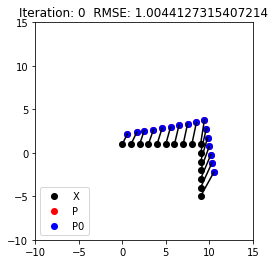

cur error :0.09694673920927628


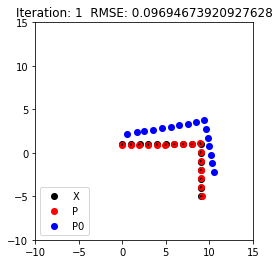

cur error :0.09694673920927607


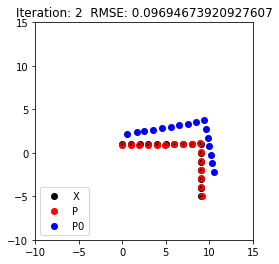

cur error :0.09694673920927621


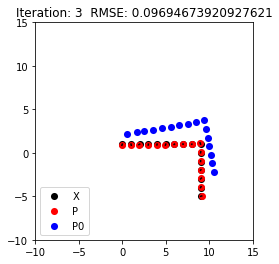

cur error :0.09694673920927607


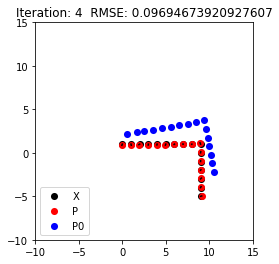

cur error :2.1669876846255


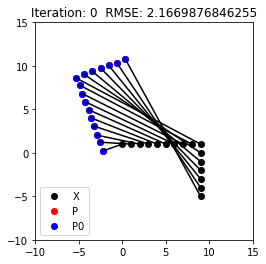

cur error :0.09694673920927557


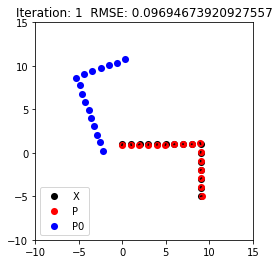

cur error :0.09694673920927573


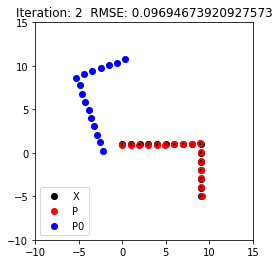

cur error :0.0969467392092755


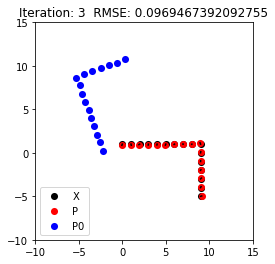

cur error :0.09694673920927573


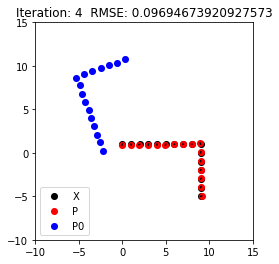

In [15]:
# Call ICP on P1 & P2

ICP(X,P1) #Uncomment this
ICP(X,P2) #Uncomment this

all the iterations gives the same answer because the exact corresponces are known so the prediction is acheived with minimum error in a single iteration and remains almost constant(changing in the range of 10^-15)